In [1]:
import uproot
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = uproot.open("root://eospublic.cern.ch//eos/opendata/cms/mc/RunIISummer20UL16NanoAODv9/DYJetsToLL_M-50_TuneCP5_13TeV-amcatnloFXFX-pythia8/NANOAODSIM/106X_mcRun2_asymptotic_v17-v1/30000/0082C29D-E74C-024A-BE9B-97B29EE7A4A2.root")

In [4]:
data.keys()

['tag;1',
 'Events;1',
 'LuminosityBlocks;1',
 'Runs;1',
 'MetaData;1',
 'ParameterSets;1']

In [5]:
# [i for i in data['Events;1'].keys() if 'tau' in i.lower()]

In [6]:
charge = data['Events;1']['Muon_charge'].array()
pt = data['Events;1']['Muon_pt'].array()
eta = data['Events;1']['Muon_eta'].array()
phi = data['Events;1']['Muon_phi'].array()
#mass = data['Events;1']['Muon_mass'].array()
nMuon = data['Events;1']['nMuon'].array()
ntau = data['Events;1']['nTau'].array()
tau_pt = data['Events;1']['Tau_pt'].array()
tau_eta = data['Events;1']['Tau_eta'].array()
tau_phi = data['Events;1']['Tau_phi'].array()
ele_pt = data['Events;1']['Electron_pt'].array()
ele_n = data['Events;1']['nElectron'].array()
ele_phi = data['Events;1']['Electron_phi'].array()
ele_eta = data['Events;1']['Electron_eta'].array()

vec_muon = ak.zip({"pt": pt, "eta": eta, "phi": phi, "nMuon": nMuon, "charge": charge}, with_name="PtEtaPhiMLorentzVector")
vec_eletron = ak.zip({"pt": ele_pt, "eta": ele_eta, "phi": ele_phi, "nElectron": ele_n}, with_name="PtEtaPhiMLorentzVector")
vec_tau = ak.zip({"pt": tau_pt, "eta": tau_eta, "phi": tau_phi, "nTau": ntau}, with_name="PtEtaPhiMLorentzVector")

In [7]:
vec_muon_filtered = vec_muon# [vec_muon.nMuon == 2]

# vec_muon_filtered = vec_muon_filtered[ak.sum(vec_muon_filtered.charge, axis=1) == 0]

vec_tau_filtered = vec_tau #[vec_tau.nTau == 2]

vec_ele_filtered = vec_eletron


In [8]:
pairs_muon = ak.combinations(vec_muon_filtered, 2)
pairs_tau = ak.combinations(vec_tau_filtered, 2)
pairs_ele = ak.combinations(vec_eletron, 2)

mu1, mu2 = ak.unzip(pairs_muon)
tau1, tau2 = ak.unzip(pairs_tau)
ele1, ele2 = ak.unzip(pairs_ele)

In [9]:
# mass = np.sqrt(
#     2 * mu1.pt * mu2.pt * (np.cosh(mu1.eta - mu2.eta) - np.cos(mu1.phi - mu2.phi))
# )

inv_mass_mu = np.sqrt(
    2 * mu1.pt * mu2.pt * (np.cosh(mu1.eta - mu2.eta) - np.cos(mu1.phi - mu2.phi))
)

inv_mass_tau = np.sqrt(
    2 * tau1.pt * tau2.pt * (np.cosh(tau1.eta - tau2.eta) - np.cos(tau1.phi - tau2.phi))
)

inv_mass_ele = np.sqrt(
    2 * ele1.pt * ele2.pt * (np.cosh(ele1.eta - ele2.eta) - np.cos(ele1.phi - ele2.phi))
)

In [10]:
inv_mass_mu = ak.flatten(inv_mass_mu)
inv_mass_tau = ak.flatten(inv_mass_tau)
inv_mass_ele = ak.flatten(inv_mass_ele)

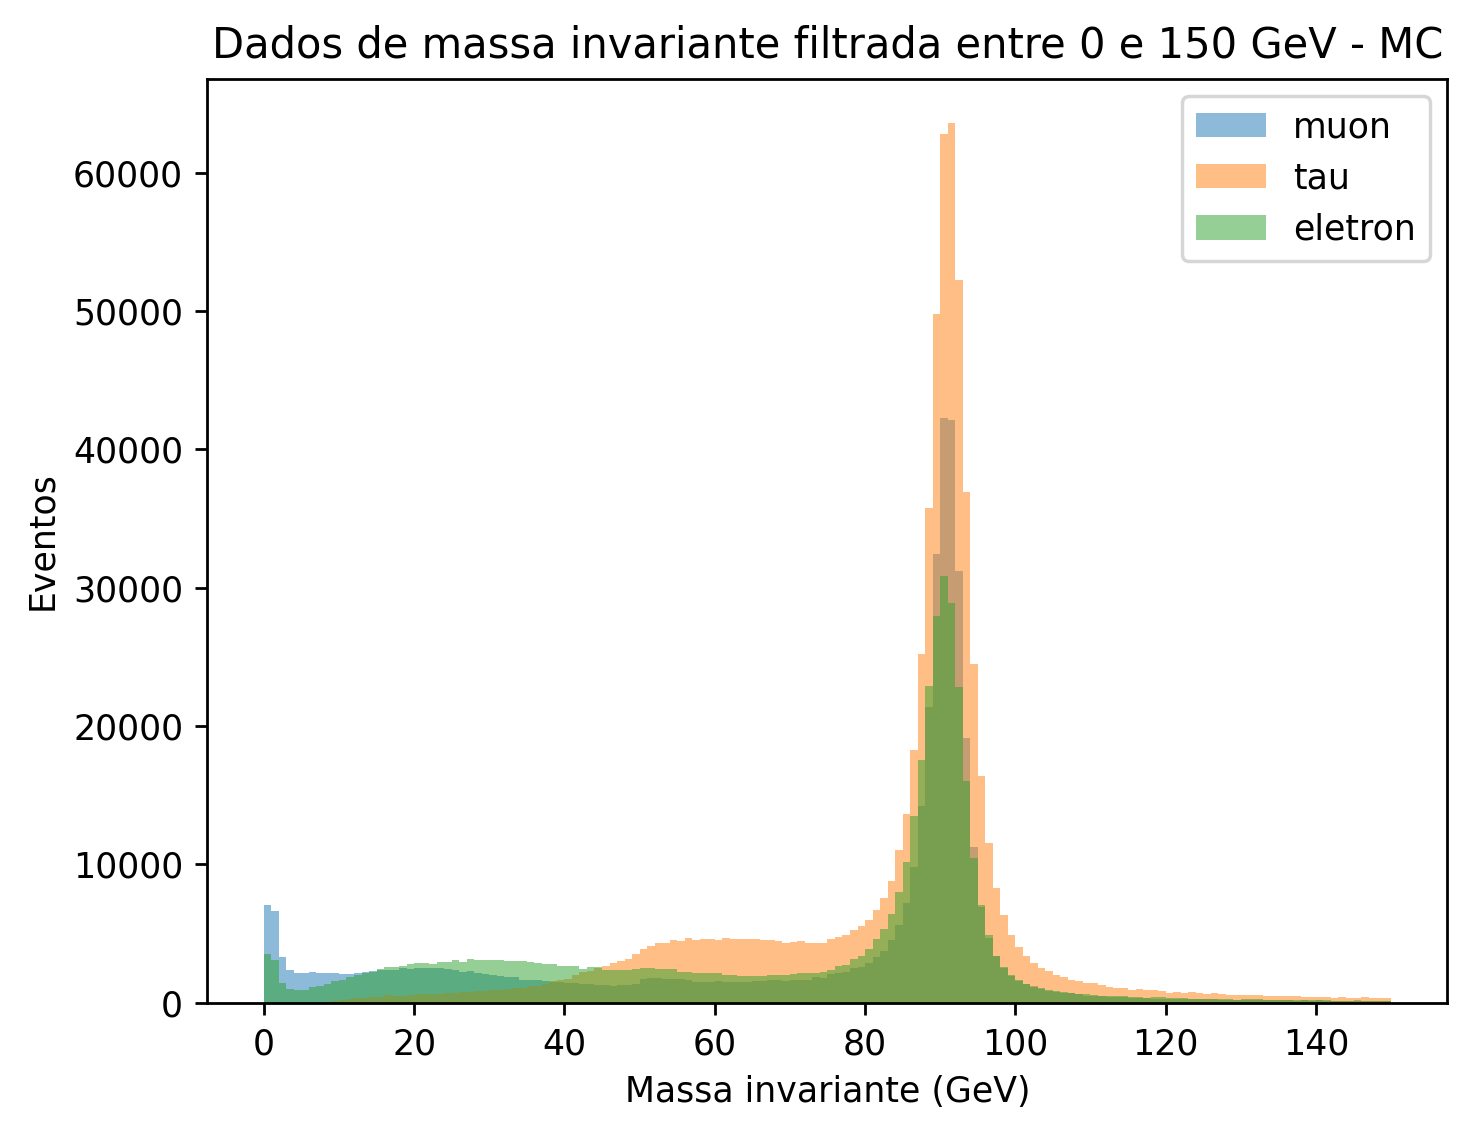

In [11]:
# plt.hist(mass, range=(0, 120), bins=100)
# plt.show()

plt.figure(dpi=250)
plt.hist(inv_mass_mu, range=(0, 150), bins=150, label="muon", alpha=0.5)
plt.hist(inv_mass_tau, range=(0, 150), bins=150, alpha=0.5, label="tau")
plt.hist(inv_mass_ele, range=(0, 150), bins=150, alpha=0.5, label="eletron")
plt.title("Dados de massa invariante filtrada entre 0 e 150 GeV - MC")
plt.xlabel("Massa invariante (GeV)")
plt.ylabel("Eventos")
plt.legend()
plt.show()

In [12]:
real = uproot.open("root://eospublic.cern.ch//eos/opendata/cms/Run2016G/DoubleMuon/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v2/2430000/05DD095C-F6C3-9A4F-9FB3-348A5A6403D5.root")

In [13]:
charge = real['Events;1']['Muon_charge'].array()
pt = real['Events;1']['Muon_pt'].array()
eta = real['Events;1']['Muon_eta'].array()
phi = real['Events;1']['Muon_phi'].array()
#mass = real['Events;1']['Muon_mass'].array()
nMuon = real['Events;1']['nMuon'].array()
ntau = real['Events;1']['nTau'].array()
tau_pt = real['Events;1']['Tau_pt'].array()
tau_eta = real['Events;1']['Tau_eta'].array()
tau_phi = real['Events;1']['Tau_phi'].array()
ele_pt = real['Events;1']['Electron_pt'].array()
ele_n = real['Events;1']['nElectron'].array()
ele_phi = real['Events;1']['Electron_phi'].array()
ele_eta = real['Events;1']['Electron_eta'].array()

vec_muon = ak.zip({"pt": pt, "eta": eta, "phi": phi, "nMuon": nMuon, "charge": charge}, with_name="PtEtaPhiMLorentzVector")
vec_eletron = ak.zip({"pt": ele_pt, "eta": ele_eta, "phi": ele_phi, "nElectron": ele_n}, with_name="PtEtaPhiMLorentzVector")
vec_tau = ak.zip({"pt": tau_pt, "eta": tau_eta, "phi": tau_phi, "nTau": ntau}, with_name="PtEtaPhiMLorentzVector")

In [14]:
vec_muon_filtered = vec_muon# [vec_muon.nMuon == 2]

# vec_muon_filtered = vec_muon_filtered[ak.sum(vec_muon_filtered.charge, axis=1) == 0]

vec_tau_filtered = vec_tau #[vec_tau.nTau == 2]

vec_ele_filtered = vec_eletron


In [14]:
inv_mass_mu = np.sqrt(
    2 * mu1.pt * mu2.pt * (np.cosh(mu1.eta - mu2.eta) - np.cos(mu1.phi - mu2.phi))
)

inv_mass_tau = np.sqrt(
    2 * tau1.pt * tau2.pt * (np.cosh(tau1.eta - tau2.eta) - np.cos(tau1.phi - tau2.phi))
)

inv_mass_ele = np.sqrt(
    2 * ele1.pt * ele2.pt * (np.cosh(ele1.eta - ele2.eta) - np.cos(ele1.phi - ele2.phi))
)

In [15]:
inv_mass_mu = ak.flatten(inv_mass_mu)
inv_mass_tau = ak.flatten(inv_mass_tau)
inv_mass_ele = ak.flatten(inv_mass_ele)

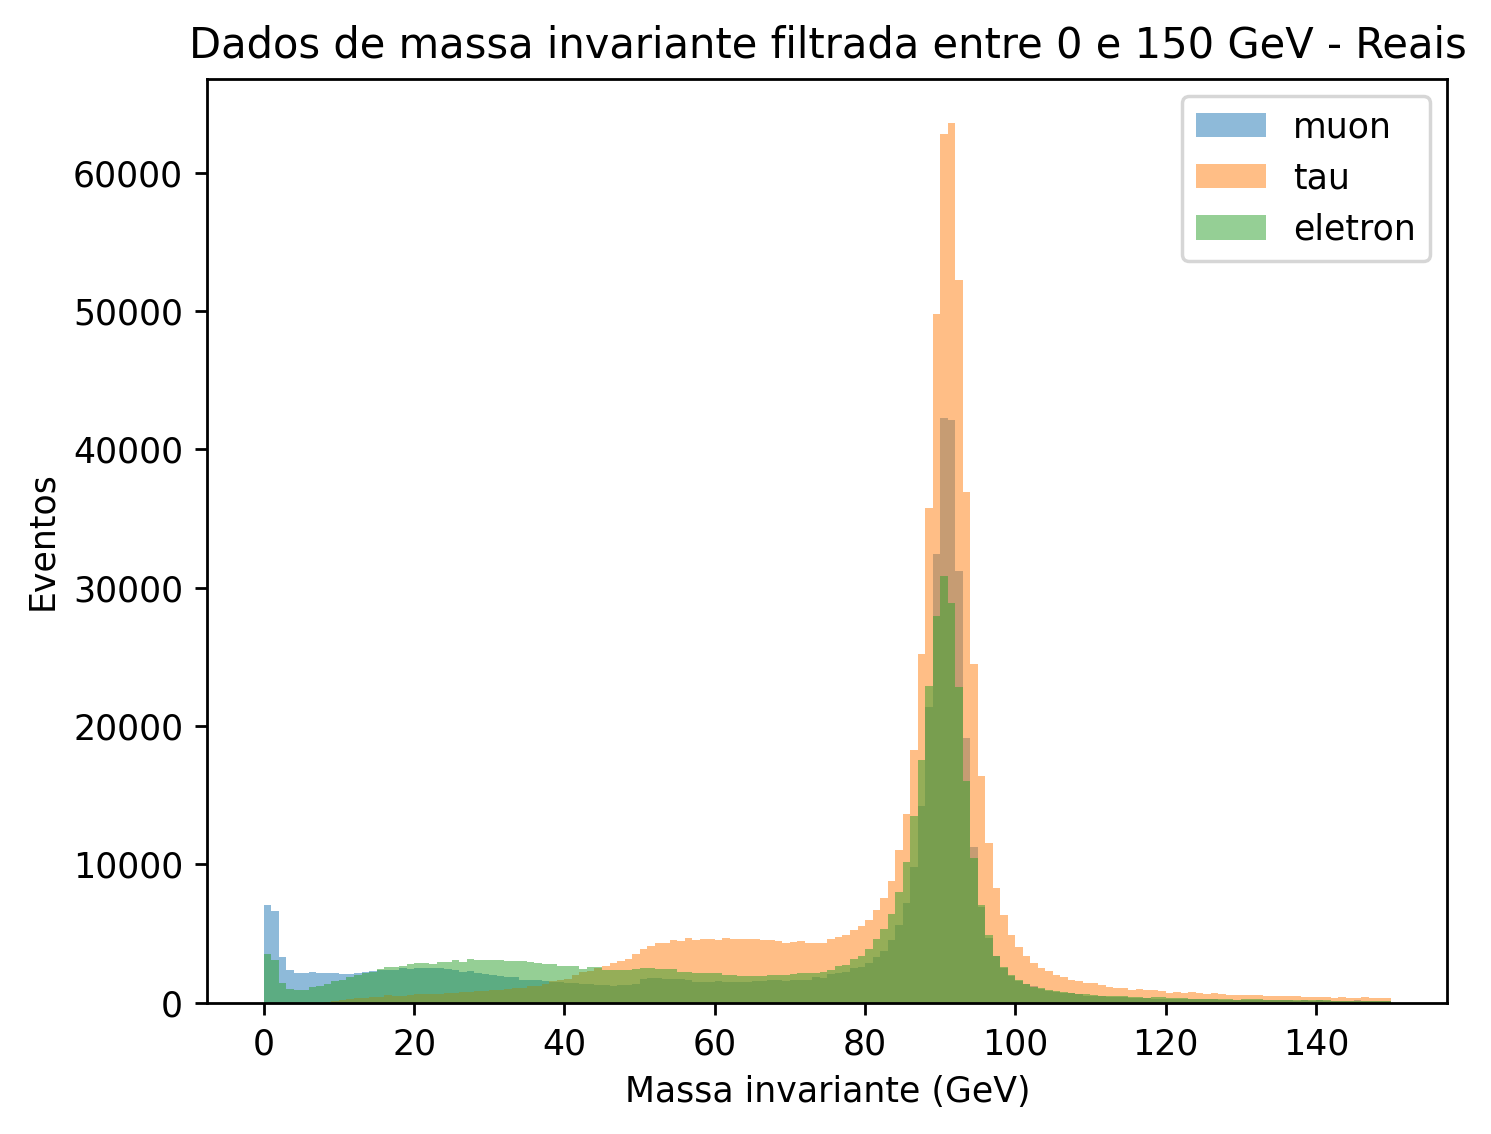

In [16]:
plt.figure(dpi=250)
plt.hist(inv_mass_mu, range=(0, 150), bins=150, label="muon", alpha=0.5)
plt.hist(inv_mass_tau, range=(0, 150), bins=150, alpha=0.5, label="tau")
plt.hist(inv_mass_ele, range=(0, 150), bins=150, alpha=0.5, label="eletron")
plt.title("Dados de massa invariante filtrada entre 0 e 150 GeV - Reais")
plt.xlabel("Massa invariante (GeV)")
plt.ylabel("Eventos")
plt.legend()
plt.show()